In [89]:
# We begin by importing numpy and pandas, as usual.
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We'll be evaluating our models as well.
from sklearn.metrics import roc_auc_score as roc
from sklearn.metrics import roc_curve
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
cat_data = pd.read_csv('2016UMFieldHockey_Catapult-Copy1.csv')

In [1]:
#output hidden to preserve data anonymity

In [20]:
cat_data.columns = [c.replace(' ', '_') for c in cat_data.columns]

In [ ]:
games = cat_data[cat_data['Activity_Name'].str.contains('Practice') == False]
games = games[cat_data['Activity_Name'].str.contains('Run') == False]
games = games[cat_data['Activity_Name'].str.contains('Activity') == False]
games = games[cat_data['Activity_Name'].str.contains('Workouts') == False]
#output hidden to preserve data anonymity

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
games.agg = games.groupby(['Activity_Name']).mean()
#output hidden to preserve data anonymity

In [71]:
ptdif = pd.read_csv('2016 Schedule - Sheet1.csv')
print ptdif

                         Team  Point Differential  Result
0                 CMU 9-18-16                  10       1
1                  Cal 9-4-16                   5       1
2            Delaware 10-8-16                  -2       0
3            Indiana 10-14-16                  -1       0
4               Iowa 10-16-16                   1       1
5         Louisville 10-29-16                   3       1
6                 MSU 9-16-16                   3       1
7                 MSU 11-3-16                   1       1
8       MSU Scrimmage 8-20-16                  -2       0
9            Maryland 9-30-16                   3       1
10      Northwestern 10-21-16                   1       1
11         Ohio State 9-23-16                   1       1
12                PSU 11-4-16                  -1       0
13                PSU 9-25-16                  -2       0
14            Rutgers 10-7-16                   2       1
15            Stanford 9-2-16                   1       1
16  Toronto Sc

In [72]:
xtrain = games.agg['Player_Load_Per_Minute'][0:7]
ytrain = ptdif['Result'][0:7]
xtest = games.agg['Player_Load_Per_Minute'][7:]
ytest = ptdif['Result'][7:]
print ytest

7     1
8     0
9     1
10    1
11    1
12    0
13    0
14    1
15    1
16    1
17    0
18    1
19    0
20    0
21    0
Name: Result, dtype: int64


In [87]:
xtrain = xtrain.reshape(-1,1)
fit = dt.fit(xtrain, ytrain)
xtest = xtest.reshape(-1,1)
yhat = dt.predict_proba(xtest)

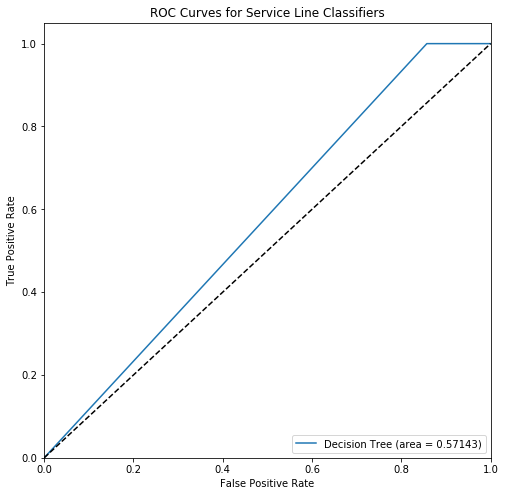

In [74]:
fig = plt.figure()
fig.set_size_inches(8,8)

fpr, tpr, _ = roc_curve(ytest, yhat[:,1])
plt.plot(fpr, tpr, label= 'Decision Tree (area = %0.5f)' % roc(ytest, yhat[:,1]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Service Line Classifiers')
plt.legend(loc="lower right")

plt.show()

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=4096, n_jobs=-1)
rf.fit(xtrain, ytrain)
yhat2 = rf.predict_proba(xtest)

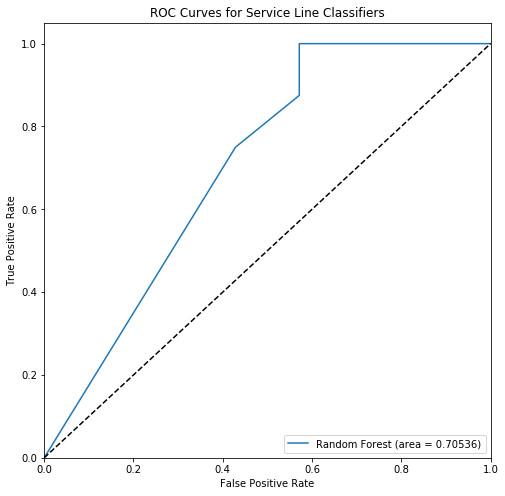

In [79]:
fig = plt.figure()
fig.set_size_inches(8,8)

fpr, tpr, _ = roc_curve(ytest, yhat2[:,1])
plt.plot(fpr, tpr, label= 'Random Forest (area = %0.5f)' % roc(ytest, yhat2[:,1]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Service Line Classifiers')
plt.legend(loc="lower right")

plt.show()

In [101]:
regr = linear_model.LinearRegression()
xtrain1 = games.agg['Meterage_Per_Minute'] 
ytrain1 = ptdif['Point Differential'] 
xtrain1 = xtrain1.reshape(-1,1)
regr.fit(xtrain1,ytrain1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

('Coeffecients : \n', array([ 0.01540807]))


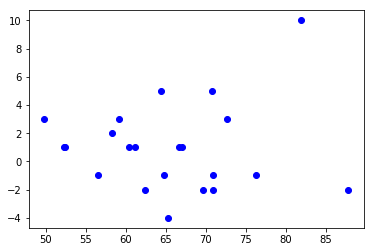

In [102]:
plt.scatter(xtrain1, ytrain1, color='blue')
print('Coeffecients : \n', regr.coef_)